## Setup

In [179]:
%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [180]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
def plot_histogram(data, title, x_title, y_title, bins=20):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=bins, kde=True)
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.show()

## Analysis

In [182]:
CSV_PATH = "../panel_data.csv"

df = pd.read_csv(CSV_PATH)

In [183]:
df["text_area_ratio"] = df["text_area"] / df["panel_area"]

print(f"{len(df[df['text_area_ratio'] >= 1])} invalid panel(s)")
df = df[df["text_area_ratio"] < 1]

num_pages = max(df["page"]) + 1
num_strips = df.groupby(["page", "strip"]).ngroups
num_panels = len(df)
print(f"{num_pages} pages")
print(f"{num_strips} strips")
print(f"{num_panels} panels")

1 invalid panel(s)
1350 pages
3210 strips
12950 panels


In [184]:
df.nlargest(10, "text_area_ratio")

,page,strip,panel,panel_area,text_area,text_area_ratio
630,59,0,5,20155,17700,0.878194
3485,326,0,7,32804,25960,0.791367
9299,899,1,3,19240,15015,0.780405
2088,197,0,1,20448,15263,0.746430
3693,347,0,3,12558,9360,0.745342
8470,810,2,3,24816,18091,0.729005
11106,1122,0,4,37230,26112,0.701370
6925,662,0,3,23547,16270,0.690959
5460,519,1,1,23852,16378,0.686651
12250,1263,0,12,11948,7671,0.642032


In [185]:
df.nlargest(10, "text_area")

,page,strip,panel,panel_area,text_area,text_area_ratio
9350,905,0,0,253470,72832,0.287340
12767,1328,0,0,252875,70356,0.278224
8954,860,0,0,247281,63238,0.255733
9245,893,0,0,251432,61161,0.243251
8932,857,0,0,250839,60639,0.241745
9538,929,0,0,253470,58749,0.231779
11527,1176,0,0,195755,52721,0.269321
9169,884,0,2,252280,50974,0.202053
10037,992,0,1,247456,48063,0.194228
12471,1292,0,0,236612,48060,0.203117


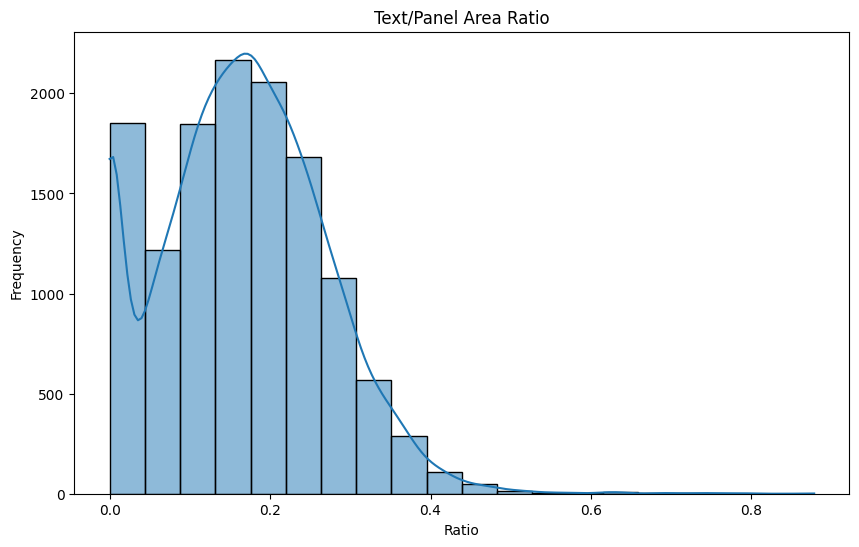

In [186]:
plot_histogram(
    df["text_area_ratio"],
    "Text/Panel Area Ratio",
    "Ratio",
    "Frequency",
)

In [187]:
Q1 = df["text_area_ratio"].quantile(0.25)
Q3 = df["text_area_ratio"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[
    (df["text_area_ratio"] >= lower_bound) & (df["text_area_ratio"] <= upper_bound)
]

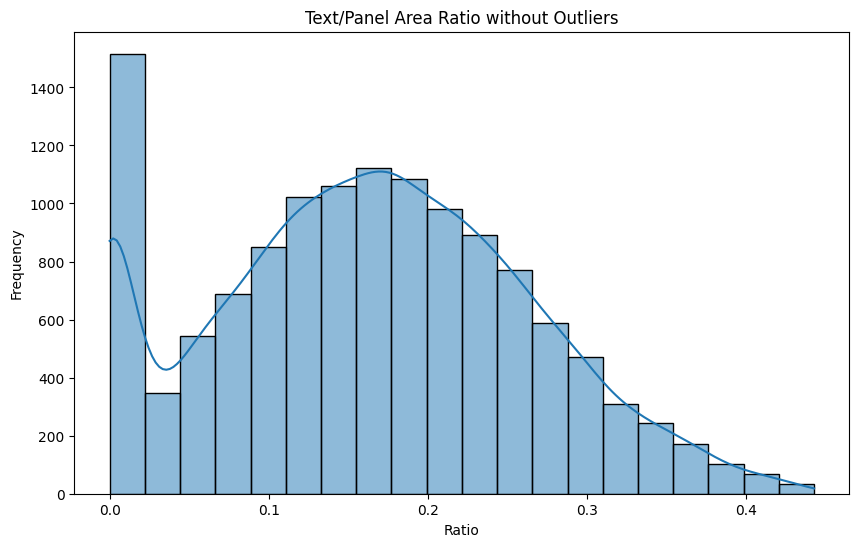

In [188]:
plot_histogram(
    df_no_outliers["text_area_ratio"],
    "Text/Panel Area Ratio without Outliers",
    "Ratio",
    "Frequency",
)

## Random plots, why not

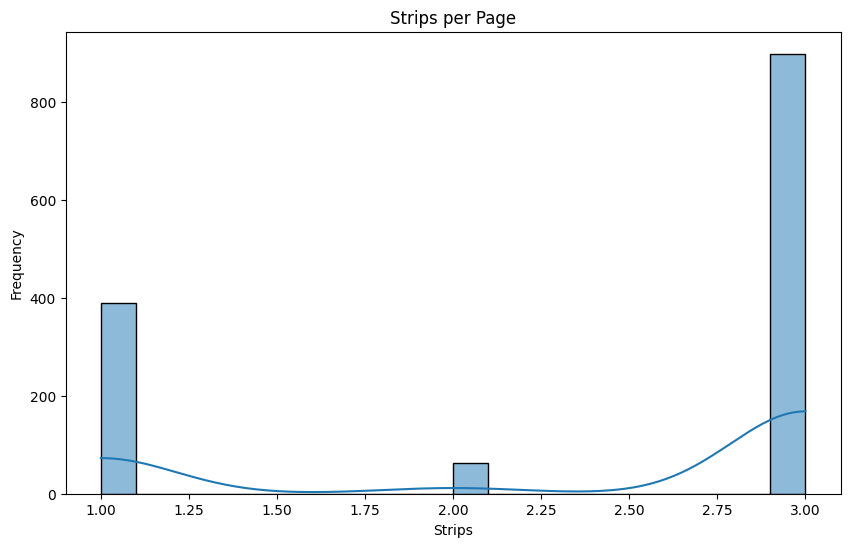

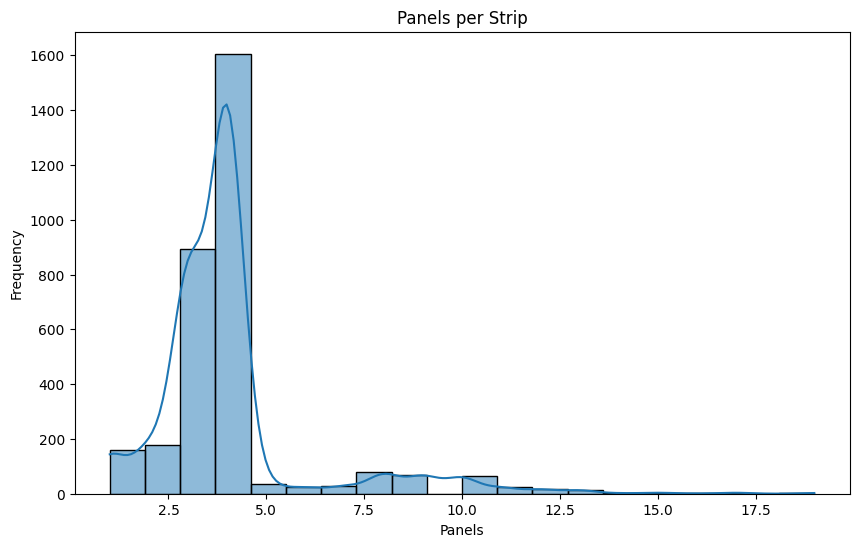

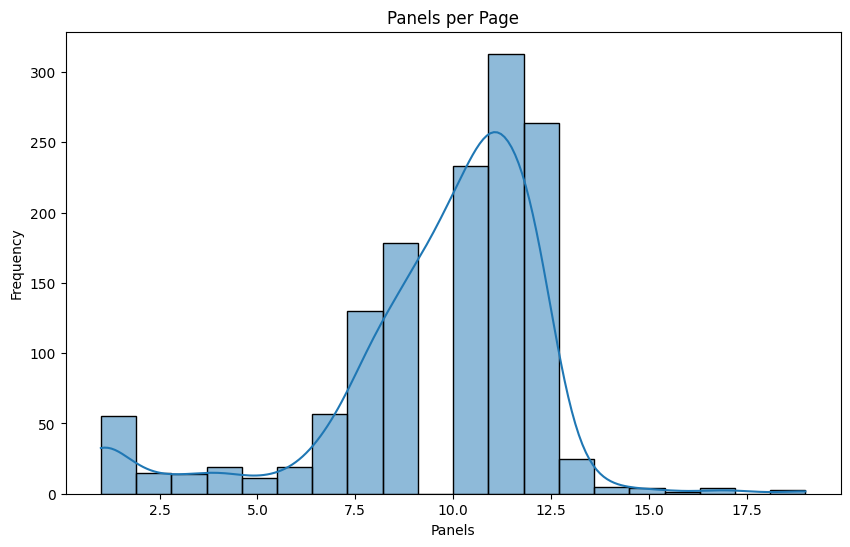

In [189]:
strips_per_page = df.groupby("page")["strip"].nunique()
panels_per_strip = df.groupby(["page", "strip"]).size()
panels_per_page = df.groupby("page").size()

plot_histogram(strips_per_page, "Strips per Page", "Strips", "Frequency")
plot_histogram(panels_per_strip, "Panels per Strip", "Panels", "Frequency")
plot_histogram(panels_per_page, "Panels per Page", "Panels", "Frequency")